In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

In [2]:
# Reading the data
data = pd.read_csv('winequality-white.csv', sep = ';')
X = data[list(data.columns)[:-1]]
Y = data['quality']

In [3]:
# Adding extra Column
X = np.append(arr = np.ones((X.shape[0], 1)), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 4, 6, 8, 9, 10, 11]]

In [4]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [5]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Building a Model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predictions= regressor.predict(X_test)

In [7]:
# Evaluating using matrices
r2_score(Y_test, predictions)

0.24640569012416924

In [8]:
# Backwards elimination
X_opt = X[:, [0, 1, 2, 4, 6, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:22:42   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.1062     18.100      8.514      0.000     118.622     189.591
x1             0.0681      0.020      3.333      0.001       0.028       0.108
x2            -1.8881      0.110    -17.242      0.000      -2.103      -1.673
x3             0.0828      0.007     11.370      0.000       0.069       0.097
x4             0.0033      0.001      4.950      0.000       0.002       0.005
x5          -154.2913     18.344     -8.411      0.000    -190.254    -118.329
x6             0.6942      0.103      6.717      0.000       0.492       0.897
x7             0.6285      0.100      6.287      0.000       0.433       0.824
x8             0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

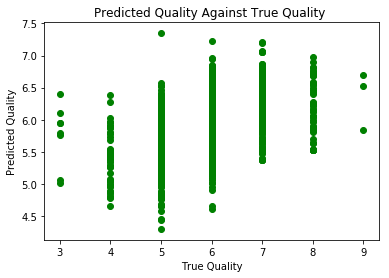

In [9]:
# Display the results
plt.scatter(Y_test, predictions, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()